# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [0]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os
!pip install chart_studio
from chart_studio import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter

     |████████████████████████████████| 71kB 2.2MB/s 


## 1.1 Reading Data

In [0]:
data = pd.read_csv('drive/My Drive/Jupyter/preprocessed_data.csv',nrows=70000)
pre_data = pd.read_csv('drive/My Drive/Jupyter/preprocessed_data.csv')

# Assignment 7: SVM

<ol>
    <li><strong>[Task-1] Apply Support Vector Machines(SGDClassifier with hinge loss: Linear SVM) on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical, numerical features + project_title(BOW) + preprocessed_eassay (BOW)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features + project_title(TFIDF)+  preprocessed_eassay (TFIDF)</li>
            <li><font color='red'>Set 3</font>: categorical, numerical features + project_title(AVG W2V)+  preprocessed_eassay (AVG W2V)</li>
            <li><font color='red'>Set 4</font>: categorical, numerical features + project_title(TFIDF W2V)+  preprocessed_eassay (TFIDF W2V)</li>        </ul>
    </li>
    <br>
    <li><strong>The hyper paramter tuning (best alpha in range [10^-4 to 10^4], and the best penalty among 'l1', 'l2')</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>Find the best hyper paramter using k-fold cross validation or simple cross validation data</li>
    <li>Use gridsearch cv or randomsearch cv or you can also write your own for loops to do this task of hyperparameter tuning
        </ul>
            </li>
    <br>
    <li><strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure.
    <img src='train_cv_auc.JPG' width=300px></li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='train_test_auc.JPG' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points. Please visualize your confusion matrices using <a href='https://seaborn.pydata.org/generated/seaborn.heatmap.html'>seaborn heatmaps.
    <img src='confusion_matrix.png' width=300px></li>
        </ul>
    </li>
    <br>
    <li><strong>[Task-2] Apply the Support Vector Machines on these features by finding the best hyper paramter as suggested in step 2 and step 3</strong>
        <ul>
    <li> Consider these set of features <font color='red'> Set 5 :</font>
            <ul>
                <li><strong>school_state</strong> : categorical data</li>
                <li><strong>clean_categories</strong> : categorical data</li>
                <li><strong>clean_subcategories</strong> : categorical data</li>
                <li><strong>project_grade_category</strong> :categorical data</li>
                <li><strong>teacher_prefix</strong> : categorical data</li>
                <li><strong>quantity</strong> : numerical data</li>
                <li><strong>teacher_number_of_previously_posted_projects</strong> : numerical data</li>
                <li><strong>price</strong> : numerical data</li>
                <li><strong>sentiment score's of each of the essay</strong> : numerical data</li>
                <li><strong>number of words in the title</strong> : numerical data</li>
                <li><strong>number of words in the combine essays</strong> : numerical data</li>
                <li><strong>Apply <a href='http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html'>TruncatedSVD</a> on <a href='https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html'>TfidfVectorizer</a> of essay text, choose the number of components (`n_components`) using <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/pca-code-example-using-non-visualization/'>elbow method</a></strong> : numerical data</li>
            </ul>
         <br>
    </li>
    <br>
    <li><strong>Conclusion</strong>
        <ul>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format. To print out a table please refer to this prettytable library<a href='http://zetcode.com/python/prettytable/'>  link</a> 
        <img src='summary.JPG' width=400px>
    </li>
        </ul>
</ol>

<h4><font color='red'>Note: Data Leakage</font></h4>

1. There will be an issue of data-leakage if you vectorize the entire data and then split it into train/cv/test.
2. To avoid the issue of data-leakage, make sure to split your data first and then vectorize it. 
3. While vectorizing your data, apply the method fit_transform() on you train data, and apply the method transform() on cv/test data.
4. For more details please go through this <a href='https://soundcloud.com/applied-ai-course/leakage-bow-and-tfidf'>link.</a>

<h1>2. Support Vector Machines </h1>

<h2>2.1 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [0]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label
y = data['project_is_approved'].values
X = data.drop(['project_is_approved'], axis=1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y)

In [0]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

print("="*100)

(46900, 20) (46900,)
(23100, 20) (23100,)


<h2>2.2 Make Data Model Ready: encoding numerical, categorical features</h2>

In [14]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding 
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label
vectorizer_cat = CountVectorizer()
vectorizer_cat.fit(pre_data['clean_categories'].values)

X_train_clean_categories = vectorizer_cat.transform(X_train['clean_categories'].values)
X_test_clean_categories = vectorizer_cat.transform(X_test['clean_categories'].values)

print(X_train_clean_categories.shape, y_train.shape)
print(X_test_clean_categories.shape, y_test.shape)
print(vectorizer_cat.get_feature_names())
print("="*100)

(46900, 9) (46900,)
(23100, 9) (23100,)
['appliedlearning', 'care_hunger', 'health_sports', 'history_civics', 'literacy_language', 'math_science', 'music_arts', 'specialneeds', 'warmth']


In [15]:
vectorizer_subcat = CountVectorizer()
vectorizer_subcat.fit(pre_data['clean_subcategories'].values) 

X_train_clean_subcategories = vectorizer_subcat.transform(X_train['clean_subcategories'].values)
X_test_clean_subcategories = vectorizer_subcat.transform(X_test['clean_subcategories'].values)

print(X_train_clean_subcategories.shape, y_train.shape)
print(X_test_clean_subcategories.shape, y_test.shape)
print(vectorizer_subcat.get_feature_names())
print("="*100)

(46900, 30) (46900,)
(23100, 30) (23100,)
['appliedsciences', 'care_hunger', 'charactereducation', 'civics_government', 'college_careerprep', 'communityservice', 'earlydevelopment', 'economics', 'environmentalscience', 'esl', 'extracurricular', 'financialliteracy', 'foreignlanguages', 'gym_fitness', 'health_lifescience', 'health_wellness', 'history_geography', 'literacy', 'literature_writing', 'mathematics', 'music', 'nutritioneducation', 'other', 'parentinvolvement', 'performingarts', 'socialsciences', 'specialneeds', 'teamsports', 'visualarts', 'warmth']


In [16]:
sorted_grade=[]
sorted_grade=sorted(pre_data['project_grade_category'].unique())
vectorizer_grade = CountVectorizer(vocabulary=sorted_grade, lowercase=False, binary=True)
vectorizer_grade.fit(pre_data['project_grade_category'].values)

X_train_project_grade = vectorizer_grade.transform(X_train['project_grade_category'].values)
X_test_project_grade = vectorizer_grade.transform(X_test['project_grade_category'].values)

print(X_train_project_grade.shape, y_train.shape)
print(X_test_project_grade.shape, y_test.shape)
print(vectorizer_grade.get_feature_names())
print("="*100)

(46900, 4) (46900,)
(23100, 4) (23100,)
['grades_3_5', 'grades_6_8', 'grades_9_12', 'grades_prek_2']


In [17]:
vectorizer_teacher = CountVectorizer()
vectorizer_teacher.fit(pre_data['teacher_prefix'].values)

X_train_teacher_prefix = vectorizer_teacher.transform(X_train['teacher_prefix'].values)
X_test_teacher_prefix = vectorizer_teacher.transform(X_test['teacher_prefix'].values)

print(X_train_teacher_prefix.shape, y_train.shape)
print(X_test_teacher_prefix.shape, y_test.shape)
print(vectorizer_teacher.get_feature_names())
print("="*100)

(46900, 5) (46900,)
(23100, 5) (23100,)
['dr', 'mr', 'mrs', 'ms', 'teacher']


In [18]:
vectorizer_state = CountVectorizer()
vectorizer_state.fit(pre_data['school_state'].values)

X_train_school_state = vectorizer_state.transform(X_train['school_state'].values)
X_test_school_state = vectorizer_state.transform(X_test['school_state'].values)

print(X_train_school_state.shape, y_train.shape)
print(X_test_school_state.shape, y_test.shape)
print(vectorizer_state.get_feature_names())
print("="*100)

(46900, 51) (46900,)
(23100, 51) (23100,)
['ak', 'al', 'ar', 'az', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga', 'hi', 'ia', 'id', 'il', 'in', 'ks', 'ky', 'la', 'ma', 'md', 'me', 'mi', 'mn', 'mo', 'ms', 'mt', 'nc', 'nd', 'ne', 'nh', 'nj', 'nm', 'nv', 'ny', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx', 'ut', 'va', 'vt', 'wa', 'wi', 'wv', 'wy']


In [19]:
from sklearn.preprocessing import MinMaxScaler

vectorizer_price = MinMaxScaler()
vectorizer_price.fit(data['price'].values.reshape(-1,1))

X_train_price = vectorizer_price.transform(X_train['price'].values.reshape(-1, 1))
X_test_price = vectorizer_price.transform(X_test['price'].values.reshape(-1, 1))

print(X_train_price.shape, y_train.shape)
print(X_test_price.shape, y_test.shape)
print("="*100)

(46900, 1) (46900,)
(23100, 1) (23100,)


In [20]:
vectorizer = MinMaxScaler()
vectorizer.fit(data['quantity'].astype(float).values.reshape(-1,1))

X_train_quantity = vectorizer.transform(X_train['quantity'].astype(float).values.reshape(-1, 1))
X_test_quantity = vectorizer.transform(X_test['quantity'].astype(float).values.reshape(-1, 1))

print(X_train_quantity.shape, y_train.shape)
print(X_test_quantity.shape, y_test.shape)
print("="*100)

(46900, 1) (46900,)
(23100, 1) (23100,)


In [21]:
vectorizer = MinMaxScaler()
vectorizer.fit(data['teacher_number_of_previously_posted_projects'].astype(float).values.reshape(-1,1))

X_train_prev_projects = vectorizer.transform(X_train['teacher_number_of_previously_posted_projects'].astype(float).values.reshape(-1, 1))
X_test_prev_projects = vectorizer.transform(X_test['teacher_number_of_previously_posted_projects'].astype(float).values.reshape(-1, 1))

print(X_train_prev_projects.shape, y_train.shape)
print(X_test_prev_projects.shape, y_test.shape)
print("="*100)

(46900, 1) (46900,)
(23100, 1) (23100,)


<h2>2.3 Make Data Model Ready: encoding eassay, and project_title</h2>

In [0]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

In [0]:
vectorizer_t_bow = CountVectorizer(min_df=10,ngram_range=(2,2), max_features=5000)
vectorizer_t_bow.fit(X_train['project_title'].values)

X_train_titles_bow = vectorizer_t_bow.transform(X_train['project_title'].values)
X_test_titles_bow = vectorizer_t_bow.transform(X_test['project_title'].values)

print(X_train_titles_bow.shape, y_train.shape)
print(X_test_titles_bow.shape, y_test.shape)
print("="*100)

(46900, 1580) (46900,)
(23100, 1580) (23100,)


In [0]:
vectorizer_e_bow = CountVectorizer(min_df=10,ngram_range=(2,2), max_features=5000)
vectorizer_e_bow.fit(X_train['essay'].values)

X_train_essay_bow = vectorizer_e_bow.transform(X_train['essay'].values)
X_test_essay_bow = vectorizer_e_bow.transform(X_test['essay'].values)

print(X_train_essay_bow.shape, y_train.shape)
print(X_test_essay_bow.shape, y_test.shape)
print("="*100)

(46900, 5000) (46900,)
(23100, 5000) (23100,)


In [25]:
vectorizer_t_tf = TfidfVectorizer(min_df=10,ngram_range=(2,2), max_features=5000)
vectorizer_t_tf.fit(X_train['project_title'].values)

X_train_titles_tfidf = vectorizer_t_tf.transform(X_train['project_title'].values)
X_test_titles_tfidf = vectorizer_t_tf.transform(X_test['project_title'].values)

print(X_train_titles_tfidf.shape, y_train.shape)
print(X_test_titles_tfidf.shape, y_test.shape)
print("="*100)

(46900, 1583) (46900,)
(23100, 1583) (23100,)


In [26]:
vectorizer_e_tf = TfidfVectorizer(min_df=10,ngram_range=(2,2), max_features=5000)
vectorizer_e_tf.fit(X_train['essay'].values)

X_train_essay_tfidf = vectorizer_e_tf.transform(X_train['essay'].values)
X_test_essay_tfidf = vectorizer_e_tf.transform(X_test['essay'].values)

print(X_train_essay_tfidf.shape, y_train.shape)
print(X_test_essay_tfidf.shape, y_test.shape)
print("="*100)

(46900, 5000) (46900,)
(23100, 5000) (23100,)


In [0]:
with open('drive/My Drive/Jupyter/glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [0]:
X_train_titles_avgw2v = []
X_test_titles_avgw2v = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['project_title'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    X_train_titles_avgw2v.append(vector)

for sentence in tqdm(X_test['project_title'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    X_test_titles_avgw2v.append(vector)

print(len(X_train_titles_avgw2v))
print(len(X_train_titles_avgw2v[0]))

print(len(X_test_titles_avgw2v))
print(len(X_test_titles_avgw2v[0]))

100%|██████████| 23100/23100 [00:00<00:00, 58131.44it/s]

46900
300
23100
300


In [0]:
X_train_essay_avgw2v = []

X_test_essay_avgw2v = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['essay'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    X_train_essay_avgw2v.append(vector)


    
for sentence in tqdm(X_test['essay'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    X_test_essay_avgw2v.append(vector)

print(len(X_train_essay_avgw2v))
print(len(X_train_essay_avgw2v[0]))

print(len(X_test_essay_avgw2v))
print(len(X_test_essay_avgw2v[0]))

100%|██████████| 23100/23100 [00:07<00:00, 3045.64it/s]

46900
300
23100
300


In [0]:
tfidf_model = TfidfVectorizer(min_df=10,ngram_range=(2,2), max_features=5000)
tfidf_model.fit(X_train['project_title'].values)
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [0]:
X_train_titles_avgtf = []

X_test_titles_avgtf = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['project_title'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    X_train_titles_avgtf.append(vector)
    

    
for sentence in tqdm(X_test['project_title'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    X_test_titles_avgtf.append(vector)

print(len(X_train_titles_avgtf))
print(len(X_train_titles_avgtf[0]))

print(len(X_test_titles_avgtf))
print(len(X_test_titles_avgtf[0]))

100%|██████████| 23100/23100 [00:00<00:00, 173853.57it/s]

46900
300
23100
300


In [0]:
tfidf_model = TfidfVectorizer(min_df=10,ngram_range=(2,2), max_features=5000)
tfidf_model.fit(X_train['essay'].values)
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [0]:
X_train_essay_avgtf = []

X_test_essay_avgtf = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['essay'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    X_train_essay_avgtf.append(vector)
    
    
for sentence in tqdm(X_test['essay'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    X_test_essay_avgtf.append(vector)

print(len(X_train_essay_avgtf))
print(len(X_train_essay_avgtf[0]))

print(len(X_test_essay_avgtf))
print(len(X_test_essay_avgtf[0]))

100%|██████████| 23100/23100 [00:01<00:00, 17360.20it/s]

46900
300
23100
300


In [0]:
#BOW DATA MATRIX
from scipy.sparse import hstack
X_train_bow = hstack((X_train_essay_bow,X_train_titles_bow,X_train_clean_categories,X_train_clean_subcategories, X_train_school_state, X_train_teacher_prefix, X_train_project_grade, X_train_price ,X_train_prev_projects,X_train_quantity)).tocsr()
X_test_bow = hstack((X_test_essay_bow,X_test_titles_bow,X_test_clean_categories ,X_test_clean_subcategories , X_test_school_state , X_test_teacher_prefix , X_test_project_grade , X_test_price ,X_test_prev_projects ,X_test_quantity )).tocsr()

In [0]:
#TFIDF DATA MATRIX

X_train_tfidf = hstack((X_train_essay_tfidf,X_train_titles_tfidf,X_train_clean_categories,X_train_clean_subcategories, X_train_school_state, X_train_teacher_prefix, X_train_project_grade, X_train_price ,X_train_prev_projects,X_train_quantity)).tocsr()
X_test_tfidf = hstack((X_test_essay_tfidf ,X_test_titles_tfidf ,X_test_clean_categories ,X_test_clean_subcategories , X_test_school_state , X_test_teacher_prefix , X_test_project_grade , X_test_price ,X_test_prev_projects ,X_test_quantity )).tocsr()

In [0]:
#AVG W2V DATA MATRIX

X_train_avgw2v = hstack((X_train_essay_avgw2v,X_train_titles_avgw2v,X_train_clean_categories,X_train_clean_subcategories, X_train_school_state, X_train_teacher_prefix, X_train_project_grade, X_train_price ,X_train_prev_projects,X_train_quantity)).tocsr()
X_test_avgw2v = hstack((X_test_essay_avgw2v  ,X_test_titles_avgw2v  ,X_test_clean_categories ,X_test_clean_subcategories , X_test_school_state , X_test_teacher_prefix , X_test_project_grade , X_test_price ,X_test_prev_projects ,X_test_quantity )).tocsr()

In [0]:
#TFIDF AVG W2V DATA MATRIX

X_train_avgtf = hstack((X_train_essay_avgtf,X_train_titles_avgtf,X_train_clean_categories,X_train_clean_subcategories, X_train_school_state, X_train_teacher_prefix, X_train_project_grade, X_train_price ,X_train_prev_projects,X_train_quantity)).tocsr()
X_test_avgtf = hstack((X_test_essay_avgtf   ,X_test_titles_avgtf   ,X_test_clean_categories ,X_test_clean_subcategories , X_test_school_state , X_test_teacher_prefix , X_test_project_grade , X_test_price ,X_test_prev_projects ,X_test_quantity )).tocsr()

<h2>2.4 Appling Support Vector Machines on different kind of featurization as mentioned in the instructions</h2>

<br>Apply Support Vector Machines on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instrucations

# SET1

In [0]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV

In [0]:
svm = SGDClassifier(loss='hinge',class_weight = 'balanced' )

parameters = {'alpha':[ 0.0001, 0.001 , 0.01, 0.2 ,1,200,1000,10000],'penalty':['l1','l2']}

clf = GridSearchCV(svm, parameters, cv= 5, scoring='roc_auc',return_train_score=True)

clf.fit(X_train_bow, y_train)

results=pd.DataFrame.from_dict(clf.cv_results_)
train_auc= results['mean_train_score']
train_auc_std= results['std_train_score']
cv_auc = results['mean_test_score'] 
cv_auc_std= results['std_test_score']
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,17.111230,2.055608,0.005572,0.000252,0.0001,l1,"{'alpha': 0.0001, 'penalty': 'l1'}",0.631104,0.619041,0.605094,0.622189,0.630327,0.621551,0.009443,4,0.830569,0.829602,0.825393,0.832009,0.828471,0.829209,0.002234
1,1.021983,0.106320,0.005354,0.000057,0.0001,l2,"{'alpha': 0.0001, 'penalty': 'l2'}",0.620430,0.617888,0.606387,0.627921,0.632331,0.620991,0.008943,5,0.868825,0.867357,0.872964,0.870290,0.866440,0.869175,0.002303
2,1.745487,0.462789,0.005623,0.000536,0.001,l1,"{'alpha': 0.001, 'penalty': 'l1'}",0.658893,0.657741,0.664139,0.655686,0.662211,0.659734,0.003053,2,0.695833,0.707974,0.702028,0.697465,0.693738,0.699408,0.005078
3,0.432580,0.112852,0.005372,0.000056,0.001,l2,"{'alpha': 0.001, 'penalty': 'l2'}",0.647245,0.639639,0.629583,0.646757,0.653498,0.643344,0.008162,3,0.845673,0.847623,0.850649,0.847453,0.845528,0.847385,0.001849
4,0.689209,0.291916,0.004848,0.000072,0.01,l1,"{'alpha': 0.01, 'penalty': 'l1'}",0.578710,0.566800,0.564928,0.558616,0.570395,0.567890,0.006623,11,0.563975,0.567211,0.577799,0.562584,0.574738,0.569261,0.005994


In [0]:
clf.best_params_

{'alpha': 0.01, 'penalty': 'l2'}

In [0]:
import math
alpha_l1=results[results['param_penalty']=='l1']['param_alpha']
alpha_l2=results[results['param_penalty']=='l2']['param_alpha']
alphas = list(map(lambda x: math.log(x),alpha_l1))
train_auc_l1=[train_auc[i] for i in range(0,len(train_auc),2)]
train_auc_l2=[train_auc[i] for i in range(1,len(train_auc),2)]

cv_auc_l1=[cv_auc[i] for i in range(0,len(cv_auc),2)]
cv_auc_l2=[cv_auc[i] for i in range(1,len(cv_auc),2)]

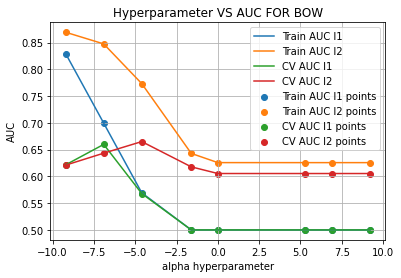

In [0]:
plt.plot(alphas, train_auc_l1, label='Train AUC l1')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')
plt.plot(alphas, train_auc_l2, label='Train AUC l2')
plt.plot(alphas, cv_auc_l1, label='CV AUC l1')
plt.plot(alphas, cv_auc_l2, label='CV AUC l2')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')


plt.scatter(alphas, train_auc_l1, label='Train AUC l1 points')
plt.scatter(alphas, train_auc_l2, label='Train AUC l2 points')
plt.scatter(alphas, cv_auc_l1, label='CV AUC l1 points')
plt.scatter(alphas, cv_auc_l2, label='CV AUC l2 points')

plt.legend()
plt.xlabel("alpha hyperparameter")
plt.ylabel("AUC")
plt.title("Hyperparameter VS AUC FOR BOW")
plt.grid()
plt.show()


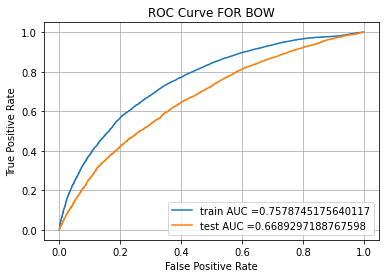

In [0]:
from sklearn.metrics import roc_curve, auc


svm = SGDClassifier(loss='hinge',alpha=0.01,penalty='l2',class_weight = 'balanced' )
svm.fit(X_train_bow, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = svm.decision_function(X_train_bow)    
y_test_pred = svm.decision_function(X_test_bow)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve FOR BOW")
plt.grid()
plt.show()

In [0]:
def find_best_threshold(threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

def predict_with_best_t(proba, threshould):
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [0]:
print("="*100)
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print("Train confusion matrix")
print(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)))
print("Test confusion matrix")
print(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)))

the maximum value of tpr*(1-fpr) 0.4787930517117551 for threshold -0.12
Train confusion matrix
[[ 4790  2322]
 [11503 28285]]
Test confusion matrix
[[ 1901  1602]
 [ 6041 13556]]


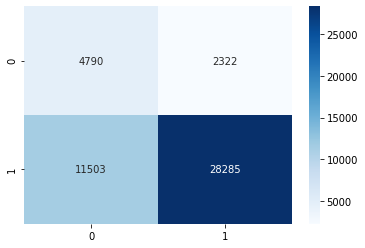

In [0]:
conf_matr_train = pd.DataFrame(confusion_matrix(y_train, predict_with_best_t(y_train_pred,best_t)), range(2),range(2))
sns.heatmap(conf_matr_train, annot=True, fmt='', cmap='Blues')

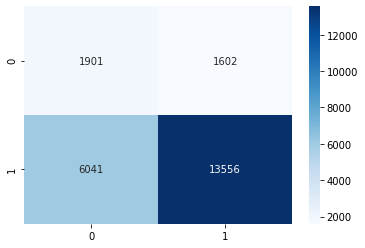

In [0]:
conf_matr_test = pd.DataFrame(confusion_matrix(y_test, predict_with_best_t(y_test_pred,best_t)), range(2),range(2))
sns.heatmap(conf_matr_test, annot=True, fmt='', cmap='Blues')

number of true positives is high while number of false negatives is also high.

# SET 2

In [0]:
svm = SGDClassifier(loss='hinge',class_weight = 'balanced' )
alpha = [ 0.0001, 0.005 , 0.01, 0.2 ,1,100,1000,10000]
parameters = {'alpha': alpha,'penalty':['l1','l2']}

clf = GridSearchCV(svm, parameters, cv= 5, scoring='roc_auc',return_train_score=True)

clf.fit(X_train_tfidf, y_train)

results=pd.DataFrame.from_dict(clf.cv_results_)
train_auc= results['mean_train_score']
train_auc_std= results['std_train_score']
cv_auc = results['mean_test_score'] 
cv_auc_std= results['std_test_score']
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.026383,0.142645,0.005404,0.000104,0.0001,l1,"{'alpha': 0.0001, 'penalty': 'l1'}",0.669279,0.666708,0.667290,0.667681,0.671350,0.668462,0.001677,1,0.765081,0.770240,0.768601,0.766223,0.769194,0.767868,0.001918
1,0.519215,0.064948,0.005519,0.000038,0.0001,l2,"{'alpha': 0.0001, 'penalty': 'l2'}",0.659757,0.657814,0.651885,0.658434,0.660087,0.657595,0.002975,2,0.833084,0.833610,0.843662,0.836273,0.840699,0.837465,0.004107
2,0.378116,0.143993,0.004978,0.000097,0.005,l1,"{'alpha': 0.005, 'penalty': 'l1'}",0.561582,0.538593,0.540998,0.540588,0.538007,0.543953,0.008887,10,0.545728,0.549808,0.547454,0.548603,0.547361,0.547791,0.001362
3,0.159594,0.032174,0.005414,0.000066,0.005,l2,"{'alpha': 0.005, 'penalty': 'l2'}",0.597546,0.577887,0.582196,0.580740,0.579501,0.583574,0.007129,3,0.600613,0.605590,0.603571,0.604921,0.606239,0.604187,0.001994
4,0.215190,0.058877,0.005122,0.000825,0.01,l1,"{'alpha': 0.01, 'penalty': 'l1'}",0.554327,0.531127,0.536938,0.537416,0.535985,0.539159,0.007907,11,0.535696,0.541106,0.543870,0.543094,0.543692,0.541492,0.003060


In [0]:
clf.best_params_

{'alpha': 0.0001, 'penalty': 'l1'}

In [0]:
alpha = list(map(lambda x: math.log(x),alpha))
train_auc_l1=[train_auc[i] for i in range(0,len(train_auc),2)]
train_auc_l2=[train_auc[i] for i in range(1,len(train_auc),2)]

cv_auc_l1=[cv_auc[i] for i in range(0,len(cv_auc),2)]
cv_auc_l2=[cv_auc[i] for i in range(1,len(cv_auc),2)]

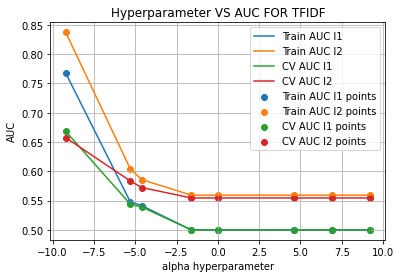

In [0]:
plt.plot(alpha, train_auc_l1, label='Train AUC l1')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')
plt.plot(alpha, train_auc_l2, label='Train AUC l2')
plt.plot(alpha, cv_auc_l1, label='CV AUC l1')
plt.plot(alpha, cv_auc_l2, label='CV AUC l2')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')


plt.scatter(alpha, train_auc_l1, label='Train AUC l1 points')
plt.scatter(alpha, train_auc_l2, label='Train AUC l2 points')
plt.scatter(alpha, cv_auc_l1, label='CV AUC l1 points')
plt.scatter(alpha, cv_auc_l2, label='CV AUC l2 points')

plt.legend()
plt.xlabel("alpha hyperparameter")
plt.ylabel("AUC")
plt.title("Hyperparameter VS AUC FOR TFIDF")
plt.grid()
plt.show()


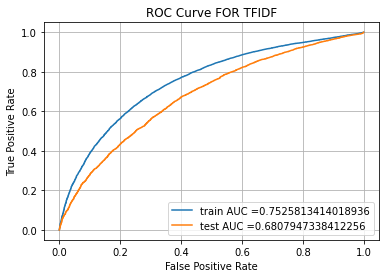

In [0]:
from sklearn.metrics import roc_curve, auc


svm = SGDClassifier(loss='hinge',alpha=0.0001,penalty='l1',class_weight = 'balanced' )
svm.fit(X_train_tfidf, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = svm.decision_function(X_train_tfidf)    
y_test_pred = svm.decision_function(X_test_tfidf)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve FOR TFIDF")
plt.grid()
plt.show()

In [0]:
print("="*100)
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print("Train confusion matrix")
print(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)))
print("Test confusion matrix")
print(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)))

the maximum value of tpr*(1-fpr) 0.4810849866497159 for threshold -0.118
Train confusion matrix
[[ 4946  2166]
 [12264 27524]]
Test confusion matrix
[[ 2078  1425]
 [ 6315 13282]]


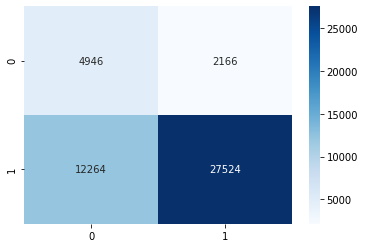

In [0]:
conf_matr_train = pd.DataFrame(confusion_matrix(y_train, predict_with_best_t(y_train_pred,best_t)), range(2),range(2))
sns.heatmap(conf_matr_train, annot=True, fmt='', cmap='Blues')

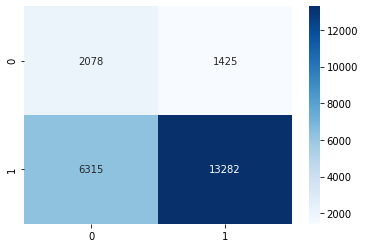

In [0]:
conf_matr_test = pd.DataFrame(confusion_matrix(y_test, predict_with_best_t(y_test_pred,best_t)), range(2),range(2))
sns.heatmap(conf_matr_test, annot=True, fmt='', cmap='Blues')

# SET 3

In [0]:
svm = SGDClassifier(loss='hinge',class_weight = 'balanced' )
alpha = [ 0.0001, 0.001 , 0.01, 0.2 ,1,200,1000,10000]
parameters = {'alpha':alpha,'penalty':['l1','l2']}

clf = GridSearchCV(svm, parameters, cv= 5, scoring='roc_auc',return_train_score=True)

clf.fit(X_train_avgw2v, y_train)

results=pd.DataFrame.from_dict(clf.cv_results_)
train_auc= results['mean_train_score']
train_auc_std= results['std_train_score']
cv_auc = results['mean_test_score'] 
cv_auc_std= results['std_test_score']
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,10.476052,3.616228,0.017804,0.000300,0.0001,l1,"{'alpha': 0.0001, 'penalty': 'l1'}",0.697672,0.690329,0.701566,0.691750,0.692788,0.694821,0.004180,2,0.725757,0.735766,0.733143,0.731401,0.722780,0.729769,0.004795
1,6.203667,1.062404,0.018014,0.000483,0.0001,l2,"{'alpha': 0.0001, 'penalty': 'l2'}",0.706339,0.689400,0.700907,0.693336,0.690160,0.696028,0.006569,1,0.731180,0.739861,0.735871,0.739382,0.729381,0.735135,0.004235
2,6.618536,0.500958,0.018433,0.000839,0.001,l1,"{'alpha': 0.001, 'penalty': 'l1'}",0.686589,0.667413,0.687171,0.675886,0.674898,0.678391,0.007527,4,0.691585,0.695339,0.695443,0.695111,0.694007,0.694297,0.001449
3,2.766839,0.567191,0.017586,0.000129,0.001,l2,"{'alpha': 0.001, 'penalty': 'l2'}",0.691967,0.678586,0.691147,0.678335,0.687582,0.685524,0.005953,3,0.714173,0.721115,0.718842,0.720609,0.719069,0.718761,0.002454
4,2.259346,0.111204,0.017623,0.000394,0.01,l1,"{'alpha': 0.01, 'penalty': 'l1'}",0.589772,0.558289,0.561238,0.569184,0.574925,0.570682,0.011202,11,0.573681,0.569312,0.568221,0.571401,0.566597,0.569842,0.002474


In [0]:
clf.best_params_

{'alpha': 0.0001, 'penalty': 'l2'}

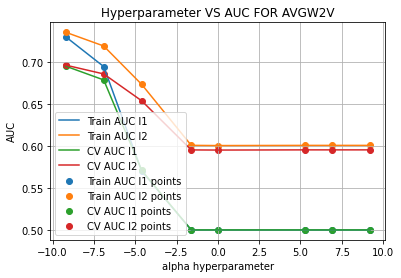

In [0]:
alpha = list(map(lambda x: math.log(x),alpha))
train_auc_l1=[train_auc[i] for i in range(0,len(train_auc),2)]
train_auc_l2=[train_auc[i] for i in range(1,len(train_auc),2)]

cv_auc_l1=[cv_auc[i] for i in range(0,len(cv_auc),2)]
cv_auc_l2=[cv_auc[i] for i in range(1,len(cv_auc),2)]

plt.plot(alpha, train_auc_l1, label='Train AUC l1')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')
plt.plot(alpha, train_auc_l2, label='Train AUC l2')
plt.plot(alpha, cv_auc_l1, label='CV AUC l1')
plt.plot(alpha, cv_auc_l2, label='CV AUC l2')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')


plt.scatter(alpha, train_auc_l1, label='Train AUC l1 points')
plt.scatter(alpha, train_auc_l2, label='Train AUC l2 points')
plt.scatter(alpha, cv_auc_l1, label='CV AUC l1 points')
plt.scatter(alpha, cv_auc_l2, label='CV AUC l2 points')

plt.legend()
plt.xlabel("alpha hyperparameter")
plt.ylabel("AUC")
plt.title("Hyperparameter VS AUC FOR AVGW2V")
plt.grid()
plt.show()


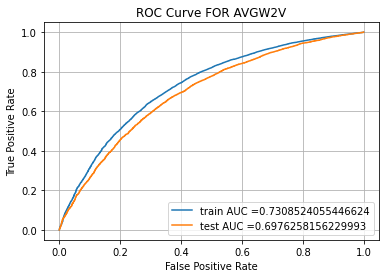

In [0]:
svm = SGDClassifier(loss='hinge',alpha=0.0001,penalty='l2',class_weight = 'balanced' )
svm.fit(X_train_avgw2v, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = svm.decision_function(X_train_avgw2v)    
y_test_pred = svm.decision_function(X_test_avgw2v)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve FOR AVGW2V")
plt.grid()
plt.show()

In [0]:
print("="*100)
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print("Train confusion matrix")
print(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)))
print("Test confusion matrix")
print(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)))

the maximum value of tpr*(1-fpr) 0.4549053777201394 for threshold 0.397
Train confusion matrix
[[ 4793  2319]
 [12931 26857]]
Test confusion matrix
[[ 2227  1276]
 [ 6554 13043]]


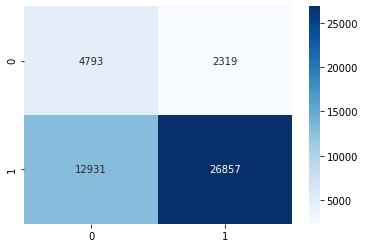

In [0]:
conf_matr_train = pd.DataFrame(confusion_matrix(y_train, predict_with_best_t(y_train_pred,best_t)), range(2),range(2))
sns.heatmap(conf_matr_train, annot=True, fmt='', cmap='Blues')

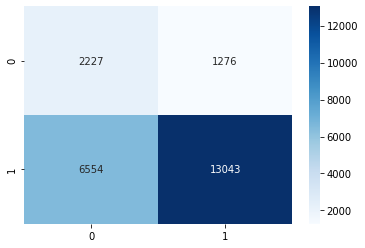

In [0]:
conf_matr_test = pd.DataFrame(confusion_matrix(y_test, predict_with_best_t(y_test_pred,best_t)), range(2),range(2))
sns.heatmap(conf_matr_test, annot=True, fmt='', cmap='Blues')

# SET 4

In [0]:
svm = SGDClassifier(loss='hinge',class_weight = 'balanced' )
alpha = [ 0.0001, 0.001 , 0.01, 0.2 ,1,200,1000,10000]
parameters = {'alpha':alpha,'penalty':['l1','l2']}

clf = GridSearchCV(svm, parameters, cv= 5, scoring='roc_auc',return_train_score=True)

clf.fit(X_train_avgtf, y_train)

results=pd.DataFrame.from_dict(clf.cv_results_)
train_auc= results['mean_train_score']
train_auc_std= results['std_train_score']
cv_auc = results['mean_test_score'] 
cv_auc_std= results['std_test_score']
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.177371,0.018670,0.004324,0.000069,0.0001,l1,"{'alpha': 0.0001, 'penalty': 'l1'}",0.617774,0.601549,0.599888,0.605482,0.602051,0.605349,0.006474,1,0.616699,0.622555,0.615548,0.619940,0.617489,0.618446,0.002509
1,0.140818,0.038299,0.004480,0.000218,0.0001,l2,"{'alpha': 0.0001, 'penalty': 'l2'}",0.605439,0.592113,0.595194,0.597596,0.593906,0.596849,0.004651,2,0.610234,0.602783,0.603868,0.612258,0.607121,0.607253,0.003616
2,0.098691,0.021617,0.004340,0.000114,0.001,l1,"{'alpha': 0.001, 'penalty': 'l1'}",0.610060,0.587621,0.583654,0.591673,0.588157,0.592233,0.009269,3,0.600490,0.599885,0.594250,0.599723,0.599550,0.598780,0.002287
3,0.074947,0.015277,0.004320,0.000067,0.001,l2,"{'alpha': 0.001, 'penalty': 'l2'}",0.592879,0.573315,0.577771,0.576799,0.573577,0.578868,0.007220,4,0.588319,0.588382,0.588006,0.591827,0.589578,0.589223,0.001408
4,0.046868,0.005464,0.003821,0.000208,0.01,l1,"{'alpha': 0.01, 'penalty': 'l1'}",0.562093,0.533933,0.534485,0.532928,0.535822,0.539852,0.011160,11,0.537050,0.544105,0.542535,0.538642,0.543624,0.541191,0.002823


In [0]:
clf.best_params_

{'alpha': 0.0001, 'penalty': 'l1'}

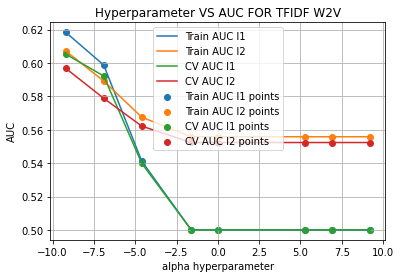

In [0]:
alpha = list(map(lambda x: math.log(x),alpha))
train_auc_l1=[train_auc[i] for i in range(0,len(train_auc),2)]
train_auc_l2=[train_auc[i] for i in range(1,len(train_auc),2)]

cv_auc_l1=[cv_auc[i] for i in range(0,len(cv_auc),2)]
cv_auc_l2=[cv_auc[i] for i in range(1,len(cv_auc),2)]

plt.plot(alpha, train_auc_l1, label='Train AUC l1')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')
plt.plot(alpha, train_auc_l2, label='Train AUC l2')
plt.plot(alpha, cv_auc_l1, label='CV AUC l1')
plt.plot(alpha, cv_auc_l2, label='CV AUC l2')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')


plt.scatter(alpha, train_auc_l1, label='Train AUC l1 points')
plt.scatter(alpha, train_auc_l2, label='Train AUC l2 points')
plt.scatter(alpha, cv_auc_l1, label='CV AUC l1 points')
plt.scatter(alpha, cv_auc_l2, label='CV AUC l2 points')

plt.legend()
plt.xlabel("alpha hyperparameter")
plt.ylabel("AUC")
plt.title("Hyperparameter VS AUC FOR TFIDF W2V")
plt.grid()
plt.show()


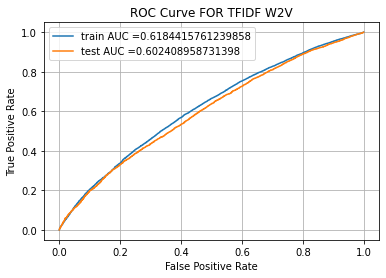

In [0]:
svm = SGDClassifier(loss='hinge',alpha=0.0001,penalty='l1',class_weight = 'balanced' )
svm.fit(X_train_avgtf, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = svm.decision_function(X_train_avgtf)    
y_test_pred = svm.decision_function(X_test_avgtf)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve FOR TFIDF W2V")
plt.grid()
plt.show()

In [0]:
print("="*100)
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print("Train confusion matrix")
print(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)))
print("Test confusion matrix")
print(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)))

the maximum value of tpr*(1-fpr) 0.34322957795551523 for threshold 0.205
Train confusion matrix
[[ 4192  2920]
 [16619 23169]]
Test confusion matrix
[[ 1955  1548]
 [ 8271 11326]]


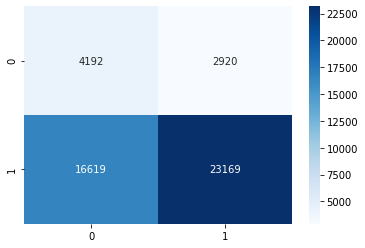

In [0]:
conf_matr_train = pd.DataFrame(confusion_matrix(y_train, predict_with_best_t(y_train_pred,best_t)), range(2),range(2))
sns.heatmap(conf_matr_train, annot=True, fmt='', cmap='Blues')

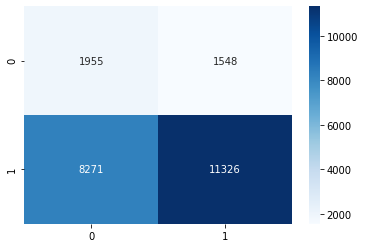

In [0]:
conf_matr_test = pd.DataFrame(confusion_matrix(y_test, predict_with_best_t(y_test_pred,best_t)), range(2),range(2))
sns.heatmap(conf_matr_test, annot=True, fmt='', cmap='Blues')

<h2>2.5 Support Vector Machines with added Features `Set 5` </h2>

In [0]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label


Number of words in title

In [8]:
title_word_count = []
for a in data["project_title"] :
    b = len(a.split())
    title_word_count.append(b)
data["title_word_count"] = title_word_count

data.head()

,Unnamed: 0,Unnamed: 0.1,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay,price,quantity,title_word_count
0,0,160221,p253737,c90749f5d961ff158d4b4d1e7dc665fc,mrs,in,2016-12-05 13:43:57,grades_prek_2,educational support english learners home,My students are English learners that are work...,"\""The limits of your language are the limits o...",NaN,NaN,My students need opportunities to practice beg...,0,0,Literacy_Language,ESL Literacy,my students english learners working english s...,154.60,23,5
1,1,140945,p258326,897464ce9ddc600bced1151f324dd63a,mr,fl,2016-10-25 09:22:10,grades_6_8,wanted projector hungry learners,Our students arrive to our school eager to lea...,The projector we need for our school is very c...,NaN,NaN,My students need a projector to help with view...,7,1,History_Civics Health_Sports,Civics_Government TeamSports,our students arrive school eager learn they po...,299.00,1,4
2,2,21895,p182444,3465aaf82da834c0582ebd0ef8040ca0,ms,az,2016-08-31 12:03:56,grades_6_8,soccer equipment awesome middle school students,"\r\n\""True champions aren't always the ones th...",The students on the campus come to school know...,NaN,NaN,"My students need shine guards, athletic socks,...",1,0,Health_Sports,Health_Wellness TeamSports,true champions not always ones win guts by mia...,516.85,22,6
3,3,45,p246581,f3cb9bffbba169bef1a77b243e620b60,mrs,ky,2016-10-06 21:16:17,grades_prek_2,techie kindergarteners,I work at a unique school filled with both ESL...,My students live in high poverty conditions wi...,NaN,NaN,My students need to engage in Reading and Math...,4,1,Literacy_Language Math_Science,Literacy Mathematics,i work unique school filled esl english second...,232.90,4,2
4,4,172407,p104768,be1f7507a41f8479dc06f047086a39ec,mrs,tx,2016-07-11 01:10:09,grades_prek_2,interactive math tools,Our second grade classroom next year will be m...,"For many students, math is a subject that does...",NaN,NaN,My students need hands on practice in mathemat...,1,1,Math_Science,Mathematics,our second grade classroom next year made arou...,67.98,4,3


Number of words in essay

In [9]:
essay_word_count = []
for a in data["essay"] :
    b = len(a.split())
    essay_word_count.append(b)
data["essay_word_count"] = essay_word_count

data.head()

,Unnamed: 0,Unnamed: 0.1,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay,price,quantity,title_word_count,essay_word_count
0,0,160221,p253737,c90749f5d961ff158d4b4d1e7dc665fc,mrs,in,2016-12-05 13:43:57,grades_prek_2,educational support english learners home,My students are English learners that are work...,"\""The limits of your language are the limits o...",NaN,NaN,My students need opportunities to practice beg...,0,0,Literacy_Language,ESL Literacy,my students english learners working english s...,154.60,23,5,161
1,1,140945,p258326,897464ce9ddc600bced1151f324dd63a,mr,fl,2016-10-25 09:22:10,grades_6_8,wanted projector hungry learners,Our students arrive to our school eager to lea...,The projector we need for our school is very c...,NaN,NaN,My students need a projector to help with view...,7,1,History_Civics Health_Sports,Civics_Government TeamSports,our students arrive school eager learn they po...,299.00,1,4,109
2,2,21895,p182444,3465aaf82da834c0582ebd0ef8040ca0,ms,az,2016-08-31 12:03:56,grades_6_8,soccer equipment awesome middle school students,"\r\n\""True champions aren't always the ones th...",The students on the campus come to school know...,NaN,NaN,"My students need shine guards, athletic socks,...",1,0,Health_Sports,Health_Wellness TeamSports,true champions not always ones win guts by mia...,516.85,22,6,202
3,3,45,p246581,f3cb9bffbba169bef1a77b243e620b60,mrs,ky,2016-10-06 21:16:17,grades_prek_2,techie kindergarteners,I work at a unique school filled with both ESL...,My students live in high poverty conditions wi...,NaN,NaN,My students need to engage in Reading and Math...,4,1,Literacy_Language Math_Science,Literacy Mathematics,i work unique school filled esl english second...,232.90,4,2,121
4,4,172407,p104768,be1f7507a41f8479dc06f047086a39ec,mrs,tx,2016-07-11 01:10:09,grades_prek_2,interactive math tools,Our second grade classroom next year will be m...,"For many students, math is a subject that does...",NaN,NaN,My students need hands on practice in mathemat...,1,1,Math_Science,Mathematics,our second grade classroom next year made arou...,67.98,4,3,122


SENTIMENT SCORE

In [10]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [11]:
analyser = SentimentIntensityAnalyzer()
essays = data['essay']
essays_sentiments = []

for essay in tqdm(essays):
    res = analyser.polarity_scores(essay)
    essays_sentiments.append(res['compound']) #Considering compound as a criteria.

data['essay_sentiment'] = essays_sentiments

100%|██████████| 70000/70000 [02:10<00:00, 536.65it/s]


In [0]:
y = data['project_is_approved'].values
X = data.drop(['project_is_approved'], axis=1)
from sklearn.model_selection import train_test_split
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X, y, test_size=0.33, stratify=y)

In [22]:
vectorizer = MinMaxScaler()
vectorizer.fit(data['essay_word_count'].astype(float).values.reshape(-1,1))

X_train_essay_count = vectorizer.transform(X_train_1['essay_word_count'].astype(float).values.reshape(-1, 1))
X_test_essay_count = vectorizer.transform(X_test_1['essay_word_count'].astype(float).values.reshape(-1, 1))

print(X_train_essay_count.shape, y_train.shape)
print(X_test_essay_count.shape, y_test.shape)
print("="*100)

(46900, 1) (46900,)
(23100, 1) (23100,)


In [27]:
vectorizer = MinMaxScaler()
vectorizer.fit(data['title_word_count'].astype(float).values.reshape(-1,1))

X_train_title_count = vectorizer.transform(X_train_1['title_word_count'].astype(float).values.reshape(-1, 1))
X_test_title_count = vectorizer.transform(X_test_1['title_word_count'].astype(float).values.reshape(-1, 1))

print(X_train_title_count.shape, y_train.shape)
print(X_test_title_count.shape, y_test.shape)
print("="*100)

(46900, 1) (46900,)
(23100, 1) (23100,)


In [28]:
vectorizer = MinMaxScaler()
vectorizer.fit(data['essay_sentiment'].astype(float).values.reshape(-1,1))

X_train_sentiment = vectorizer.transform(X_train_1['essay_sentiment'].astype(float).values.reshape(-1, 1))
X_test_sentiment = vectorizer.transform(X_test_1['essay_sentiment'].astype(float).values.reshape(-1, 1))

print(X_train_sentiment.shape, y_train.shape)
print(X_test_sentiment.shape, y_test.shape)
print("="*100)

(46900, 1) (46900,)
(23100, 1) (23100,)


In [29]:
#https://medium.com/swlh/truncated-singular-value-decomposition-svd-using-amazon-food-reviews-891d97af5d8d
from sklearn.decomposition import TruncatedSVD
n_comp = [4,10,15,150,500,700,900,1000,1500,3000,4000,4500]
variance_sum=[]

for i in tqdm(n_comp):
    svd = TruncatedSVD(n_components=i, n_iter=5)
    svd.fit(X_train_essay_tfidf)
    variance_sum.append(svd.explained_variance_ratio_.sum())

100%|██████████| 12/12 [27:52<00:00, 139.37s/it]


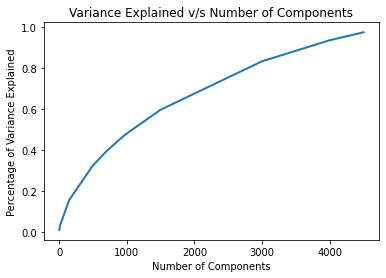

In [30]:
plt.xlabel("Number of Components")
plt.ylabel("Percentage of Variance Explained")
plt.title("Variance Explained v/s Number of Components")
plt.plot(n_comp,variance_sum,lw=2)
plt.show()

In [0]:
optimalDimension=4000

In [0]:
svd = TruncatedSVD(n_components=optimalDimension, n_iter=5)
svd.fit(X_train_essay_tfidf)
x_train_essay_svd=svd.transform(X_train_essay_tfidf)
x_test_essay_svd=svd.transform(X_test_essay_tfidf)

In [0]:
#TFIDF DATA MATRIX
from scipy.sparse import hstack
X_train_tfidf_svd = hstack((x_train_essay_svd,X_train_clean_categories,X_train_clean_subcategories, X_train_school_state, X_train_teacher_prefix, X_train_project_grade, X_train_price ,X_train_prev_projects,X_train_quantity)).tocsr()
X_test_tfidf_svd = hstack((x_test_essay_svd  ,X_test_clean_categories ,X_test_clean_subcategories , X_test_school_state , X_test_teacher_prefix , X_test_project_grade , X_test_price ,X_test_prev_projects ,X_test_quantity )).tocsr()

In [37]:
svm = SGDClassifier(loss='hinge')
alpha = [ 0.0001, 0.005 , 0.01, 0.2 ,1,100,1000,10000]
parameters = {'alpha':alpha,'penalty':['l1','l2']}

clf = GridSearchCV(svm, parameters, cv= 5, scoring='roc_auc',return_train_score=True)

clf.fit(X_train_tfidf_svd, y_train)

results=pd.DataFrame.from_dict(clf.cv_results_)
train_auc= results['mean_train_score']
train_auc_std= results['std_train_score']
cv_auc = results['mean_test_score'] 
cv_auc_std= results['std_test_score']
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,18.447922,1.568709,0.095000,0.003186,0.0001,l1,"{'alpha': 0.0001, 'penalty': 'l1'}",0.627886,0.569120,0.602682,0.605401,0.595988,0.600215,0.018886,4,0.631785,0.584275,0.616750,0.598569,0.597176,0.605711,0.016644
1,7.764410,0.400977,0.093170,0.000938,0.0001,l2,"{'alpha': 0.0001, 'penalty': 'l2'}",0.655432,0.631043,0.641615,0.648679,0.646088,0.644571,0.008110,1,0.784576,0.771033,0.775196,0.768491,0.774878,0.774835,0.005472
2,8.517345,0.024566,0.092984,0.000841,0.005,l1,"{'alpha': 0.005, 'penalty': 'l1'}",0.499175,0.506779,0.529659,0.499575,0.540517,0.515141,0.016863,11,0.492259,0.512694,0.534929,0.506282,0.541853,0.517603,0.018346
3,3.547186,0.008484,0.092515,0.001203,0.005,l2,"{'alpha': 0.005, 'penalty': 'l2'}",0.657299,0.630453,0.639676,0.630404,0.653056,0.642178,0.011219,2,0.744516,0.748112,0.751827,0.731426,0.755627,0.746302,0.008310
4,9.342054,1.332888,0.092435,0.000605,0.01,l1,"{'alpha': 0.01, 'penalty': 'l1'}",0.557518,0.515922,0.486797,0.542239,0.522888,0.525073,0.024087,10,0.536761,0.515242,0.498091,0.530182,0.524566,0.520969,0.013442


In [38]:
clf.best_params_

{'alpha': 0.0001, 'penalty': 'l2'}

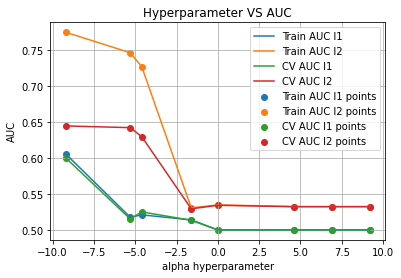

In [40]:
import math
alpha = list(map(lambda x: math.log(x),alpha))
train_auc_l1=[train_auc[i] for i in range(0,len(train_auc),2)]
train_auc_l2=[train_auc[i] for i in range(1,len(train_auc),2)]

cv_auc_l1=[cv_auc[i] for i in range(0,len(cv_auc),2)]
cv_auc_l2=[cv_auc[i] for i in range(1,len(cv_auc),2)]

plt.plot(alpha, train_auc_l1, label='Train AUC l1')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')
plt.plot(alpha, train_auc_l2, label='Train AUC l2')
plt.plot(alpha, cv_auc_l1, label='CV AUC l1')
plt.plot(alpha, cv_auc_l2, label='CV AUC l2')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')


plt.scatter(alpha, train_auc_l1, label='Train AUC l1 points')
plt.scatter(alpha, train_auc_l2, label='Train AUC l2 points')
plt.scatter(alpha, cv_auc_l1, label='CV AUC l1 points')
plt.scatter(alpha, cv_auc_l2, label='CV AUC l2 points')

plt.legend()
plt.xlabel("alpha hyperparameter")
plt.ylabel("AUC")
plt.title("Hyperparameter VS AUC")
plt.grid()
plt.show()

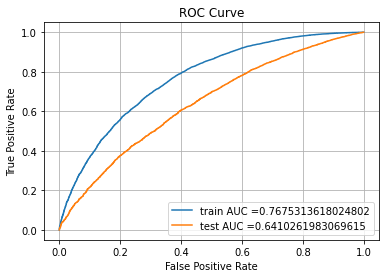

In [41]:
svm = SGDClassifier(loss='hinge',alpha=0.0001,penalty='l2')
svm.fit(X_train_tfidf_svd, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = svm.decision_function(X_train_tfidf_svd)    
y_test_pred = svm.decision_function(X_test_tfidf_svd)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.grid()
plt.show()

In [44]:
print("="*100)
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print("Train confusion matrix")
print(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)))
print("Test confusion matrix")
print(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)))

the maximum value of tpr*(1-fpr) 0.48483141753656583 for threshold 1.077
Train confusion matrix
[[ 4890  2222]
 [11732 28056]]
Test confusion matrix
[[ 1854  1649]
 [ 6474 13123]]


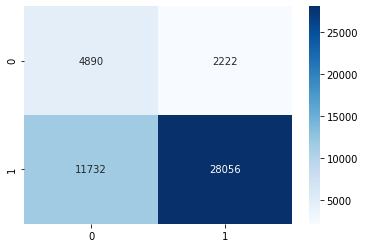

In [45]:
conf_matr_train = pd.DataFrame(confusion_matrix(y_train, predict_with_best_t(y_train_pred,best_t)), range(2),range(2))
sns.heatmap(conf_matr_train, annot=True, fmt='', cmap='Blues')

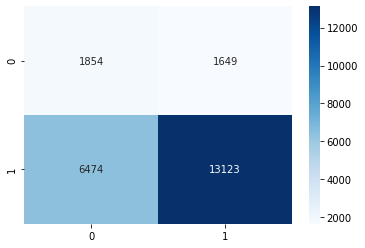

In [46]:
conf_matr_test = pd.DataFrame(confusion_matrix(y_test, predict_with_best_t(y_test_pred,best_t)), range(2),range(2))
sns.heatmap(conf_matr_test, annot=True, fmt='', cmap='Blues')

<h1>3. Conclusion</h1>

In [48]:
# Please compare all your models using Prettytable library
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ["Vectorizer", "Alpha", "Penalty", "Train AUC","Test AUC"]

x.add_row(["BOW", 0.01,'l2', 0.77, 0.64])
x.add_row(["TFIDF", 0.05,'l2',0.75, 0.63])
x.add_row(["AVGW2V", 0.0001,'l2',0.70, 0.68])
x.add_row(["TFIDF W2V", 0.0001,'l1',0.53, 0.53])
x.add_row(["WITH TRUNCATED SVD", 0.0001,'l2',0.76, 0.64])

print (x)

+--------------------+--------+---------+-----------+----------+
|     Vectorizer     | Alpha  | Penalty | Train AUC | Test AUC |
+--------------------+--------+---------+-----------+----------+
|        BOW         |  0.01  |    l2   |    0.77   |   0.64   |
|       TFIDF        |  0.05  |    l2   |    0.75   |   0.63   |
|       AVGW2V       | 0.0001 |    l2   |    0.7    |   0.68   |
|     TFIDF W2V      | 0.0001 |    l1   |    0.53   |   0.53   |
| WITH TRUNCATED SVD | 0.0001 |    l2   |    0.76   |   0.64   |
+--------------------+--------+---------+-----------+----------+


SUMMARY :
The bow model gives the best AUC amongst all others.